In [59]:
# Dependencies and Setup
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [60]:
# File to Load (Remember to Change These)
file_to_load = "data/CleanTrain_merged.csv"

# Read Purchasing File and store into Pandas data frame
Train_data = pd.read_csv(file_to_load)
Train_data.head()

,Store,DayOfWeek,Date,month,year,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,7/31/2015,7,2015,5263,555,1,1,0,1,1270.0,9,2008,0
1,1,4,7/30/2015,7,2015,5020,546,1,1,0,1,1270.0,9,2008,0
2,1,3,7/29/2015,7,2015,4782,523,1,1,0,1,1270.0,9,2008,0
3,1,2,7/28/2015,7,2015,5011,560,1,1,0,1,1270.0,9,2008,0
4,1,1,7/27/2015,7,2015,6102,612,1,1,0,1,1270.0,9,2008,0


In [61]:
Train_data.dropna()
Train_data.head()


,Store,DayOfWeek,Date,month,year,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,7/31/2015,7,2015,5263,555,1,1,0,1,1270.0,9,2008,0
1,1,4,7/30/2015,7,2015,5020,546,1,1,0,1,1270.0,9,2008,0
2,1,3,7/29/2015,7,2015,4782,523,1,1,0,1,1270.0,9,2008,0
3,1,2,7/28/2015,7,2015,5011,560,1,1,0,1,1270.0,9,2008,0
4,1,1,7/27/2015,7,2015,6102,612,1,1,0,1,1270.0,9,2008,0


##### Checking For Outliers

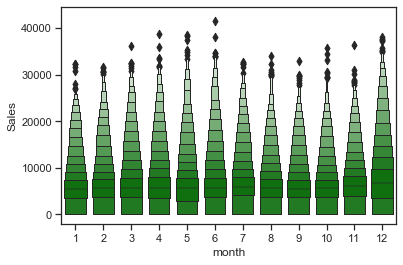

In [62]:
year_sales = sns.boxenplot(data=Train_data,scale="linear",x="month",y="Sales",color="green")

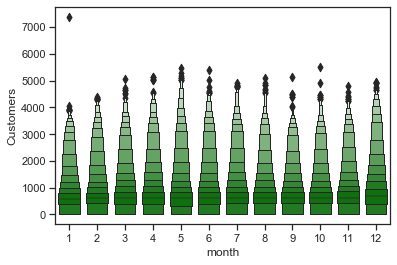

In [63]:
year_customer = sns.boxenplot(data=Train_data,y="Customers", x="month", scale="linear",color="green")

In [64]:
Train_data["Sales"]=Train_data["Sales"].apply(lambda x: 20000 if x>20000 else x)
Train_data["Customers"]=Train_data["Customers"].apply(lambda y: 3000 if y>3000 else y)
print(max(Train_data["Sales"]))
print(max(Train_data["Customers"]))

20000
3000


In [70]:
clean_data = Train_data.loc[(Train_data['Sales'] < 20000) & (Train_data['Sales'] > 100) & (Train_data['Customers'] < 3000)]


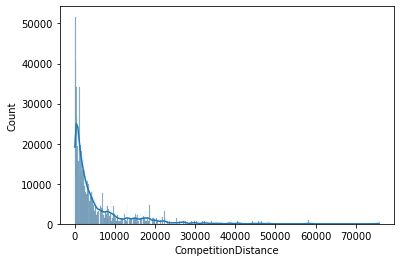

In [47]:
distance = sns.histplot(data=clean_data, x="CompetitionDistance", kde=True)

#### Competition distance matters. There are more customers when the competition is closer.

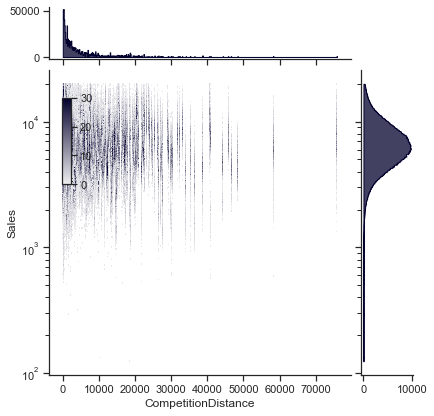

In [56]:
sns.set_theme(style="ticks")

g = sns.JointGrid(data=clean_data, x="CompetitionDistance", y="Sales", marginal_ticks=True)

g.ax_joint.set(yscale="log")

cax = g.fig.add_axes([.15, .55, .02, .2])

g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

#### The competition distance does not affect the amount in sales.

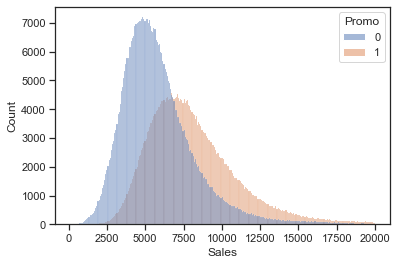

In [67]:
promo = sns.histplot(data=clean_data, x="Sales", hue="Promo")

#### More larger sales with promo

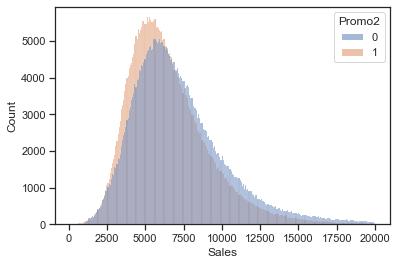

In [68]:
promo2 = sns.histplot(data=clean_data, x="Sales", hue="Promo2")

#### Second promo does not appear to encourage larger sales

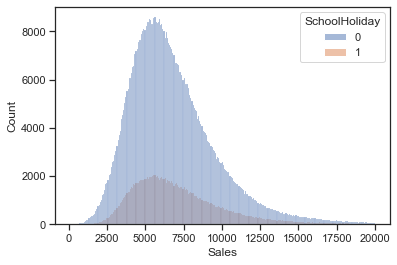

In [69]:
state = sns.histplot(data=clean_data, x="Sales", hue="SchoolHoliday")

#### Less sales when there is a school holiday

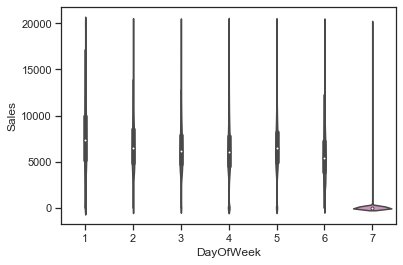

In [74]:
Day_sales = sns.violinplot(data=Train_data,x="DayOfWeek",y="Sales")

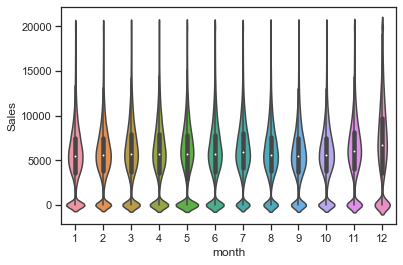

In [76]:
Month_sales = sns.violinplot(data=Train_data,x="month",y="Sales")